<a href="https://colab.research.google.com/github/Ylvu/DeepLearning/blob/main/Laboration1_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Laboration Faltningsnät (CNN)**
Ylva Öckerman

# Förberedelser

*   Importera bibliotek
*   Import dataset
*   Lägga till namn på klasser

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers

#from tensorflow.keras import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
#from tensorflow.keras.metrics import sparse_categorical_crossentropy, SparseCategoricalCrossentropy

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']




Förbereder data
*   Skalar om värdena så att de är i storleksordning 0-1 och är float
*   Delar upp data i valideringsdata (10000 bilder) och träningsdata (60000 bilder)
*   Skriver ut hur många bilder som är i varje kategori





In [2]:
train_images = train_images / 255.0
test_images = test_images / 255.0

val_images = train_images[:10000]
val_labels = train_labels[:10000]
train_labels = train_labels[10000:]
train_images = train_images[10000:]

print('Train:       images %s, labels %s' % (train_images.shape, train_labels.shape))
print('Validation:  images %s, labels %s' % (val_images.shape, val_labels.shape))
print('Test:        images %s, labels %s' % (test_images.shape, test_labels.shape))


Train:       images (50000, 28, 28), labels (50000,)
Validation:  images (10000, 28, 28), labels (10000,)
Test:        images (10000, 28, 28), labels (10000,)


Plotta hur många labels av respektive typ som finns i varje kategori. Detta för att försäkra mig om att det inte blivit ojämn fördelning då training-data delades upp i validation och train.

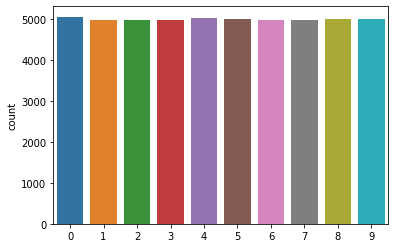

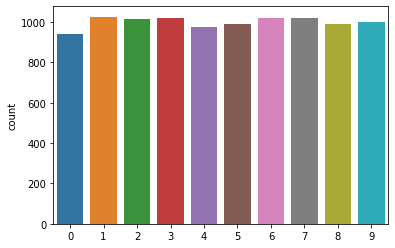

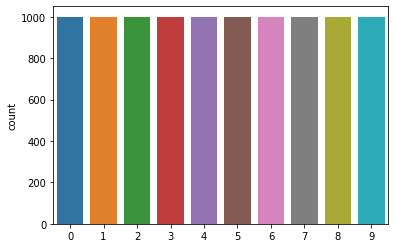

In [55]:
plt.figure()
train_plot = sns.countplot(x=train_labels)
plt.figure()
val_plot = sns.countplot(x=val_labels)
plt.figure()
test_plot = sns.countplot(x=test_labels)

# Modell 1
*   Conv2D och Maxpooling2D minskar bilderna samtidigt som de behåller detaljer/features. Det ger snabbare behandling + gör så att det är lättare att känna igen en viss feature oavsett var i bilden den finns.
*   Har två lager:
*   Relu släpper igenom positiva värden
*   Softmax kommer att välja det största värdet och ignorera resten, vilket är lämpligt på det sista lagret som ska avgöra kategori


*   Optimizern Stochastic Gradient används
*   Learning rate har jag testat 0.01, 0.005, 0.002, 0.001, 0.0005. Default (0.001) har gett bäst noggrannhet på 10 epoker.
*   Momentum tillåter att riktningen återanvänds från tidigare steg på något vis (grafen över noggranheten  blir jämnare), det gav bättre noggranhet än utan.





In [32]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
model1.add(MaxPooling2D((2, 2)))

model1.add(Flatten()) #flatten to 1D-array
model1.add(Dense(150, activation='relu', kernel_initializer='he_uniform'))
model1.add(Dense(10, activation='softmax')) #softmax 


model1.compile(
    optimizer=SGD(momentum=0.9),
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

model1.summary()

history1 = model1.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels), verbose=2)

test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_23 (Flatten)        (None, 5408)              0         
                                                                 
 dense_46 (Dense)            (None, 150)               811350    
                                                                 
 dense_47 (Dense)            (None, 10)                1510      
                                                                 
Total params: 813,180
Trainable params: 813,180
Non-trainable params: 0
_______________________________________________

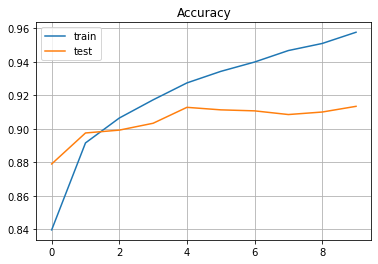

In [51]:
plt.subplot(111)
plt.title('Accuracy')
plt.grid()
plt.plot(history1.history['accuracy'], label='train')
plt.plot(history1.history['val_accuracy'], label='test')
plt.legend()
plt.show()

# Modell 2
Likadan som modell 1, men använder optimizer Adam istället.
Även här har jag testat olika värden på learning rate (0.01, 0.005, 0.002, 0.001, 0.0005), men default har gett bäst resultat.

In [31]:
model2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    # Dense(64), #det här extra lagret bidrog ingenting
    Dense(10, activation='softmax')
])

model2.summary()

model2.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels), verbose=2)

test_loss, test_acc = model2.evaluate(test_images, test_labels,  verbose=2)
print('\nTest accuracy:', test_acc)

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 flatten_22 (Flatten)        (None, 5408)              0         
                                                                 
 dense_44 (Dense)            (None, 128)               692352    
                                                                 
 dense_45 (Dense)            (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_______________________________________________

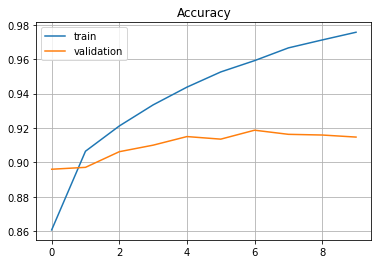

In [48]:
plt.subplot(111)
plt.title('Accuracy')
plt.grid()
plt.plot(history2.history['accuracy'], label='train')
plt.plot(history2.history['val_accuracy'], label='validation')
plt.legend()
plt.show()

# Modell 3
Modellen är likadan som modell två, förutom att den saknar Conv2D och Maxpooling2D. Det blir en skillnad i noggrannhet. Modell 3 når **inte** 90%

In [33]:
model3 = Sequential([
  Flatten(), 
  Dense(128, activation=tf.nn.relu), 
  Dense(10, activation=tf.nn.softmax)
  ])

model3.compile(optimizer = Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(val_images, val_labels), verbose=2)

test_loss, test_acc = model3.evaluate(test_images, test_labels,  verbose=2)
print('\nTest accuracy:', test_acc)


Epoch 1/10
1563/1563 - 6s - loss: 0.5175 - accuracy: 0.8185 - val_loss: 0.4238 - val_accuracy: 0.8493 - 6s/epoch - 4ms/step
Epoch 2/10
1563/1563 - 5s - loss: 0.3871 - accuracy: 0.8621 - val_loss: 0.3931 - val_accuracy: 0.8527 - 5s/epoch - 3ms/step
Epoch 3/10
1563/1563 - 4s - loss: 0.3478 - accuracy: 0.8736 - val_loss: 0.3517 - val_accuracy: 0.8713 - 4s/epoch - 3ms/step
Epoch 4/10
1563/1563 - 4s - loss: 0.3224 - accuracy: 0.8825 - val_loss: 0.3230 - val_accuracy: 0.8830 - 4s/epoch - 3ms/step
Epoch 5/10
1563/1563 - 4s - loss: 0.3010 - accuracy: 0.8902 - val_loss: 0.3110 - val_accuracy: 0.8852 - 4s/epoch - 3ms/step
Epoch 6/10
1563/1563 - 5s - loss: 0.2845 - accuracy: 0.8944 - val_loss: 0.3125 - val_accuracy: 0.8810 - 5s/epoch - 3ms/step
Epoch 7/10
1563/1563 - 4s - loss: 0.2727 - accuracy: 0.8984 - val_loss: 0.3105 - val_accuracy: 0.8848 - 4s/epoch - 3ms/step
Epoch 8/10
1563/1563 - 4s - loss: 0.2617 - accuracy: 0.9023 - val_loss: 0.3167 - val_accuracy: 0.8842 - 4s/epoch - 3ms/step
Epoch 9/

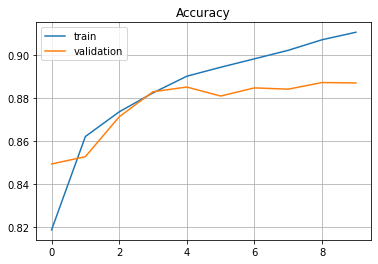

In [50]:
plt.subplot(111)
plt.title('Accuracy')
plt.grid()
plt.plot(history3.history['accuracy'], label='train')
plt.plot(history3.history['val_accuracy'], label='validation')
plt.legend()
plt.show()